# Example 1: Basic fitting 
This example covers the generation of toy data, and basic fitting using the phifitter package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from phifitter import fitter
from phifitter import generator
from phifitter import loss
from phifitter import physics_model
from phifitter import plotter

%matplotlib inline

### Generate Data 
There is a utility to generate simple data in phifitter.generator.  It returns 3 numpy arrays.  By default, it will use the physics_model class instance BeamSpinAsymmetry.  It will seed the 3 parameters randomly.  This can produce unphysical results, but can be used to test the fitters.

In [2]:
model = physics_model.BeamSpinAsymmetryModel() 
parameters = np.array([0.05, 0.0, 0.0])
phi, value, error = generator.generate(model=model, 
                                       parameters=parameters,
                                      error=0.015, n_values=12)

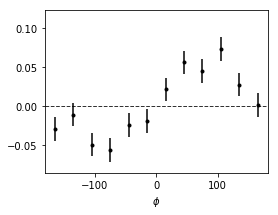

In [3]:
plotter.plot_phi(phi, value, error)
plt.savefig('image/phi.pdf', bbox_inches='tight')

### Perform fits
This fit should be relatively easy, due to the number of bins and the size of the error compared to the size of the asymmetry.

In [4]:
# Parameter bounds, these are physically motivated
bounds = [[-1, 1], [-1, 1], [-1, 1]]
x0 = [0.0, 0.0, 0.0]

In [5]:
# we're going to showcase several different fitters 
fitters = {}

fitters['single'] = fitter.SingleFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds)
fitters['regularized'] = fitter.SingleRegularizedFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds, 
                                        penalty=0.1)
fitters['replica'] = fitter.ReplicaFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds,
                                         n_replicas=200, 
                                         n_cores=8)

# flat
def prior(p):
    return 1.0

fitters['bayesian-vegas'] = fitter.BayesianVegasFitter(model=model,
                                                      likelihood=loss.likelihood,
                                                      prior=prior,
                                                      bounds=bounds)

fitters['bayesian-mcmc'] = fitter.BayesianMCMCFitter(model=model,
                                                      likelihood=loss.likelihood,
                                                      prior=prior,
                                                      bounds=bounds,
                                                    n_iterations=20000)

In [6]:
results = {}

for name in fitters.keys():
    results[name] = fitters[name].fit(phi, value, error)

For now, the results of the fit are stored inside the fitter.

In [7]:
for name in results.keys():
    print('method = %s, loss = %.3f, quality = %.3f' % (name, results[name].loss, results[name].quality))

method = bayesian-mcmc, loss = 9.496, quality = 0.660
method = regularized, loss = 10.054, quality = 0.611
method = single, loss = 10.747, quality = 0.551
method = replica, loss = 9.572, quality = 0.653
method = bayesian-vegas, loss = 9.465, quality = 0.512


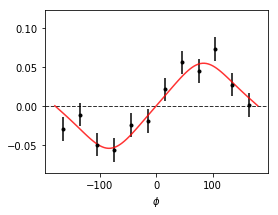

In [8]:
plotter.plot_single_fit(phi, value, error, model)
plt.savefig('image/single-fit.pdf', bbox_inches='tight')

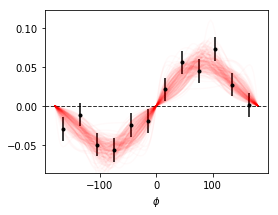

In [9]:
plotter.plot_replicas(phi, value, error, model, results['replica'].replicas)
plt.savefig('image/replica-fit.pdf', bbox_inches='tight')

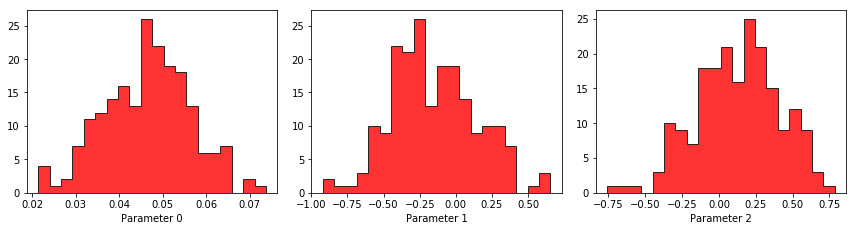

In [10]:
plotter.plot_parameter_histogram(results['replica'].replicas, 
                                 bins=20)
plt.savefig('image/replica-hist.pdf', bbox_inches='tight')

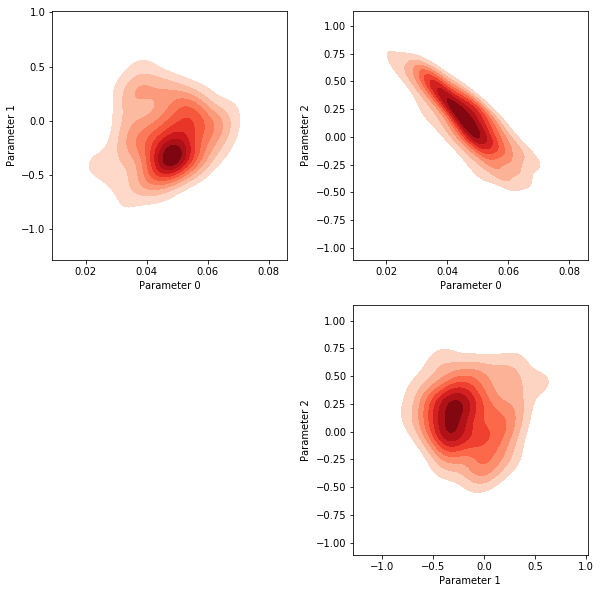

In [11]:
plotter.plot_kde_grid(results['replica'].replicas)
plt.savefig('image/replica-kde.pdf', bbox_inches='tight')

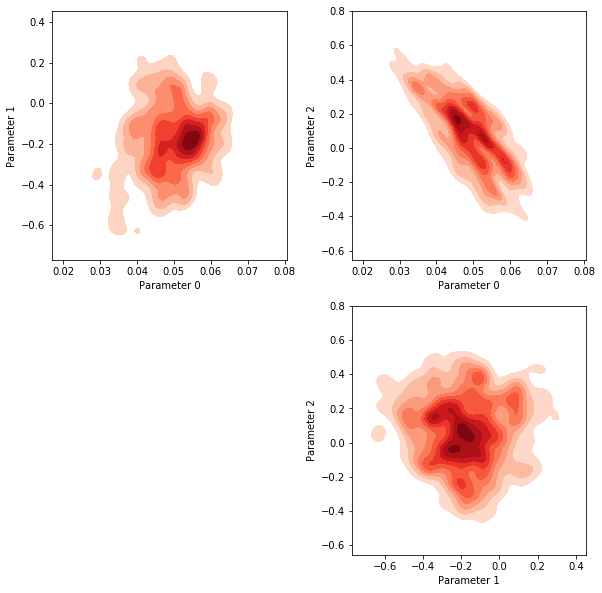

In [12]:
plotter.plot_kde_grid(results['bayesian-mcmc'].samples)
plt.savefig('image/mcmc-kde.pdf', bbox_inches='tight')

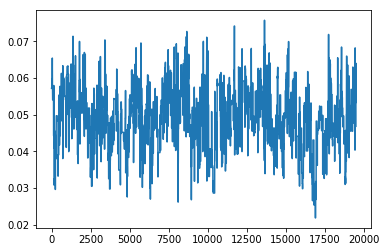

In [13]:
plt.plot(results['bayesian-mcmc'].samples[:,0], linestyle='-')
plt.savefig('image/mcmc-trace0.pdf', bbox_inches='tight')

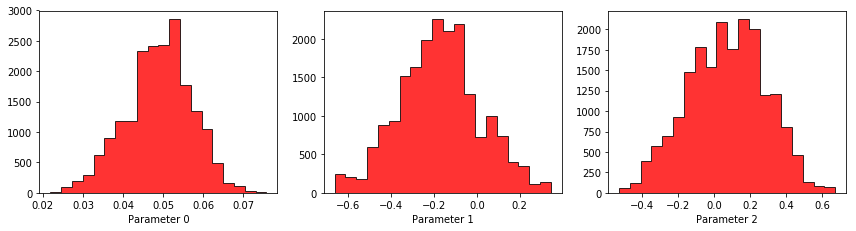

In [14]:
plotter.plot_parameter_histogram(results['bayesian-mcmc'].samples, 
                                 bins=20)
plt.savefig('image/mcmc-hist.pdf', bbox_inches='tight')

In [15]:
for name in results.keys():
    print(name, results[name].fit_parameters, results[name].fit_errors)

('bayesian-mcmc', array([ 0.04889293, -0.17479876,  0.0693709 ]), array([0.00826488, 0.18763024, 0.21758063]))
('regularized', array([ 0.04200482, -0.06163806,  0.33542391]), array([1., 1., 1.]))
('single', array([ 0.04206363, -0.4492788 ,  0.26622403]), array([7.89999326e-06, 1.00000000e+00, 1.00000000e+00]))
('replica', array([ 0.04648311, -0.14930162,  0.12818117]), array([0.00990329, 0.2909207 , 0.28260031]))
('bayesian-vegas', array([ 0.04706079, -0.14872418,  0.13045701]), array([0.00858309, 0.21736637, 0.21136224]))


In [16]:
fitter_names = [n for n in fitters.keys()]
par_results = np.array([fitter.fit_parameters for fitter in results.values()])
par_errors = np.array([fitter.fit_errors for fitter in results.values()])

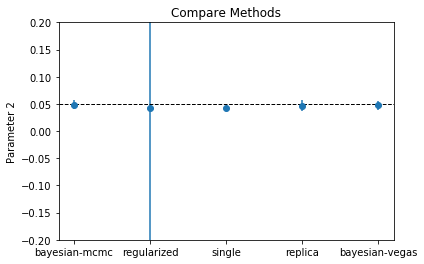

In [17]:
plt.errorbar(x=fitter_names, y=par_results[:,0], yerr=par_errors[:,0], 
            linestyle='', marker='o')
plt.ylim([-0.2, 0.2])
plt.title('Compare Methods')
plt.ylabel('Parameter 2')
plt.axhline(parameters[0], linestyle='--', color='black', linewidth=1)
plt.savefig('image/compare-methods-par0.pdf', bbox_inches='tight')

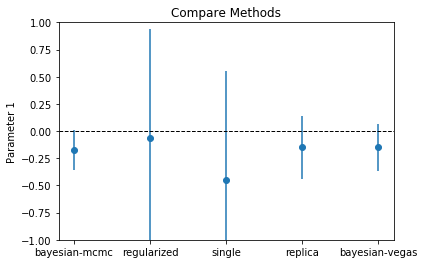

In [18]:
plt.errorbar(x=fitter_names, y=par_results[:,1], yerr=par_errors[:,1], 
            linestyle='', marker='o')
plt.ylim([-1, 1])
plt.axhline(parameters[1], linestyle='--', color='black', linewidth=1)
plt.title('Compare Methods')
plt.ylabel('Parameter 1')
plt.savefig('image/compare-methods-par1.pdf', bbox_inches='tight')

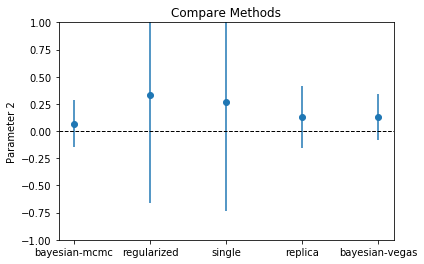

In [19]:
plt.errorbar(x=fitter_names, y=par_results[:,2], yerr=par_errors[:,2], 
            linestyle='', marker='o')
plt.ylim([-1, 1])
plt.axhline(parameters[2], linestyle='--', color='black', linewidth=1)
plt.title('Compare Methods')
plt.ylabel('Parameter 2')
plt.savefig('image/compare-methods-par2.pdf', bbox_inches='tight')